In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm

In [2]:
train_path = './DevanagariHandwrittenCharacterDataset/train/'
test_path = './DevanagariHandwrittenCharacterDataset/test/'

In [3]:
def generate_data(path):
    labels = ''
    images = []
    for folder in tqdm(os.listdir(path)):
        label = folder.split('_')[-1]
        image_paths = os.listdir(os.path.join(path, folder))
        data = list(map( lambda image: plt.imread(os.path.join(path, folder, image)).reshape(1024), image_paths))
        images.extend(data)
        labels += (label + ',') * len(image_paths)
    labels = labels.split(',')
    return np.array(images), np.array(labels[:-1])

In [4]:
images, labels = generate_data(train_path)

In [5]:
images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
# Converting Numpy array to Pandas Dataframe
df = pd.DataFrame(images)

In [7]:
## We need to normalize the dataframe.
df = df / 255

In [8]:
## Merging image pixel with the labels

#df['labels'] = labels

## Extracting images of letter ka

mask = labels == 'ka'

ka_data = df[mask]

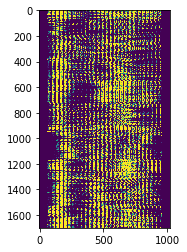

In [9]:
plt.imshow(ka_data)

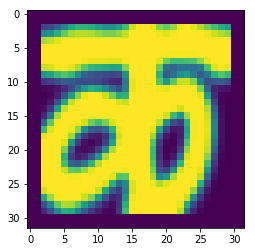

In [10]:
plt.imshow(np.array(ka_data.iloc[0]).reshape(32,32))

Covariance is a measure of the extent to which corresponding elements from two sets of ordered data move in the same direction. We use the following formula to compute covariance.

Covariance matrix is a symmatric and squared matrix. 

We need the covariance matrix to be 
- Non-Singular
- Positive Definite

In [11]:
cov = np.cov(ka_data)

Non-Singularity of a matrix is some of the matrix vectors are linearly dependent.<br>
We can check the non-singularity of the matrix 
- Calculating the determinant of the covariance matrix ( If determinant is zero that means matrix is singular). 



In [12]:
## Calculating the determinant
det = np.linalg.det(cov)
print ('Determinant of Covariance Matrix: %.1f'%det)

Determinant of Covariance Matrix: -0.0


Writing code for joint gaussian probability distribution. 

Formula 

\begin{equation}
P(X_0 = x_0 \cap X_1 = x_1 \cap ... \cap X_N = x_n | y = अ) = \frac{P(Y = अ | X_0 = x_0 \cap X_1 = x_1 \cap ... \cap X_N = x_n)P(अ)}{Total Porbability} \end{equation}<br>
So, we are assuming all the feature are gaussianly distributed. 
Then we can use <b>Gaussian Probabilty Distribution Function</b> to calculate the probability for every character. 

$$P(X_0 = x_0 \cap X_1 = x_1 \cap ... \cap X_N = x_n | y = अ) = P(X_0 = x_0 | y = अ)\thinspace \cap P(X_0 = x_0 | y = अ) \thinspace\cap... \cap\thinspace P(X_N = x_N | y = अ) $$

Every image have total 1024 pixels. So we have to create the probability distribution function for 1024 values. Which is computationally expensive. 
So, we can use a different type of distribution where instead of dealing with one pixel per pdf. We can input all the pixels at once and make computation on all parameters at once. 
This type of probability distribution function is known as **Joint Probability Distribution Function**. 

So, Joint PDF for Gaussian Distribution is:


$$P(X_0 = x_0 \cap X_1 = x_1\cap...\cap X_N = x_n) = \frac{1}{\sqrt{({2 \pi})^2} {\sqrt{\det({\Sigma})}}} e ^ {{\begin{bmatrix} x_0 - \mu_{x_0} \\ . \\ .\\ x_N - \mu_{x_n}\end{bmatrix}}^T \thinspace\Sigma^{-1} \begin{bmatrix} x_0 - \mu_{x_0} \\ . \\ .\\ x_N - \mu_{x_n}\end{bmatrix}  } $$



In [105]:
def Gauss_joint_pdf(x, mu, cov):
    
    x = np.array(x)
    mu = np.array(mu)
    
    first = 1 / (np.sqrt((2 * np.pi) ** 2) * (np.sqrt(np.linalg.det(cov))))
    print (first)
    zero_mean_val = x - mu
    f = (np.linalg.inv(cov).dot(zero_mean_val))
    g = zero_mean_val.T.dot(f)
    print(g)
    second = np.e ** g
    print (second)
    return first * second

Determinant of Covariance matrix is 0. That means that matrix is Singular. 

So, now we have to choose the columns which are linearly independent. For that we can use 

**Principle Component Analysis**<br>
PCA is a dimensionality reduction algorithm, which we use to when we have too many dimensions. So, it will be computationally complex to make calculation for 1million feature. So, we have to take only those feature vector which having very high variance. And leave others.


PCA is using Singular Value Decomposition to extract features with 

In [98]:
def PCA(data, thrashold):
    ## We are taking the data columns. 
    
    cov = data.cov()
    
    Q, lambda_val, Q_T = np.linalg.svd(cov)
    
    ## Taking column number 
    col_no = np.argmax(Q, axis = 1)
    
    lam_sum = np.sum(lambda_val)
    
    value = 0
    
    col_list = []
    
    for ind, i in enumerate(lambda_val):
        
        value += i
        
        col_list.append(col_no[ind])
        
        data_cov = data[col_list].cov()
        
        det_val = np.linalg.det(data_cov)
           
        preserve = value/ lam_sum

        if (preserve > thrashold) or not det_val > 0:
            col_list = col_list[:-1]
            value -= i
    
    return col_list[:-1]

In [99]:
column_names = PCA(ka_data, 0.99)

In [71]:
data = df[column_names]

In [106]:
x = Gauss_joint_pdf(np.random.randint(0, 255, 49) / 255, data.mean(axis = 0), data.cov())

1.4609714071170758e+155
31878045.327024296


C:\Users\ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':


inf


In [73]:
np.linalg.det(df[column_names].cov())


1.18674341485e-312

In [104]:
x

inf